In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
from operator import attrgetter
import matplotlib.colors as mcolors

In [2]:
rfm_df = pd.read_csv(r'data.csv',encoding="ISO-8859-1")
rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
#Descriptive Statistics
rfm_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [4]:
# CHecking cases where unit price less than 0
rfm_df[rfm_df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [5]:
# filtering rows on unit price greater than 0
rfm_df = rfm_df[rfm_df['UnitPrice']>=0]

In [6]:
#Rows and COlumn count of Dataframe
rfm_df.shape

(541907, 8)

In [7]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541907 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541907 non-null  object 
 1   StockCode    541907 non-null  object 
 2   Description  540453 non-null  object 
 3   Quantity     541907 non-null  int64  
 4   InvoiceDate  541907 non-null  object 
 5   UnitPrice    541907 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541907 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [8]:
#extracting only Date
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].apply(lambda x: x.split()[0])

<ipython-input-8-3594727a0940>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].apply(lambda x: x.split()[0])


In [9]:
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])

<ipython-input-9-cbc1cd472c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])


In [10]:
#dropping columns less than 0 quantity
rfm_df = rfm_df[rfm_df['Quantity']>=0]

In [11]:
#COnverting datatype to string
rfm_df.loc[:,'CustomerID'] = rfm_df.loc[:,'CustomerID'].astype('object') 

In [12]:
# Unique customer count
rfm_df['CustomerID'].nunique()

4339

In [13]:
#range of transaction Data
print(rfm_df['InvoiceDate'].min(),"to", rfm_df['InvoiceDate'].max())

2010-12-01 00:00:00 to 2011-12-09 00:00:00


In [14]:
# change description - UPPER case to LOWER case
rfm_df['Description'] = rfm_df.Description.str.lower()

In [15]:
rfm_df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [16]:
#can't perform RFM analysis without customer_id so let's drop the rows which are null for customer_id
rfm_df = rfm_df[rfm_df['CustomerID'].isna()==False]

In [17]:
#after removal only 397,000 records remain
rfm_df.shape

(397924, 8)

In [18]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [19]:
rfm_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01,2.75,17850,United Kingdom


In [20]:
#creating column for total purchase value of each prodcut in each invoice
rfm_df['total_value'] = rfm_df['Quantity']*rfm_df['UnitPrice']

In [21]:
rfm_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [22]:
#extracting year and month from invoice date
rfm_df['year'] = rfm_df['InvoiceDate'].dt.year
rfm_df['month'] = rfm_df['InvoiceDate'].dt.month

In [23]:
#creating column year_month so that overlap of months amidst 2 years can be understood
rfm_df['year_month'] = rfm_df['year'].astype(str) + "_" + rfm_df['month'].astype(str)

In [24]:
# calculating no of days its been since purchase date from 2012-01-01 as benchmark
d1 = pd.to_datetime(20120101, format='%Y%m%d')
rfm_df['days_since'] = d1 - rfm_df['InvoiceDate']
rfm_df['days_since'] = rfm_df['days_since'].apply(lambda x: x.days)

### EDA

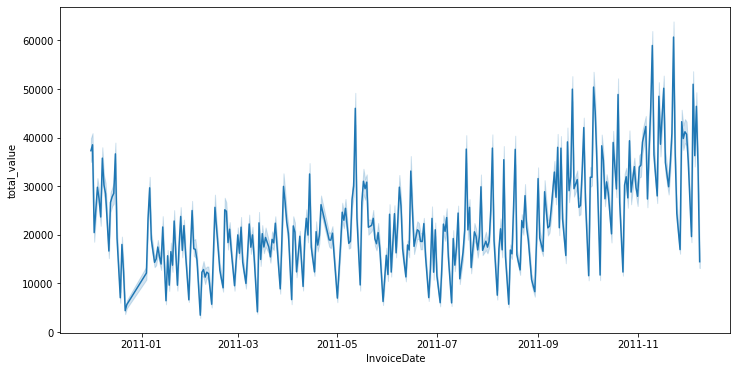

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x='InvoiceDate', y='total_value', estimator='sum', data=rfm_df[rfm_df['total_value']<=250])
plt.show()

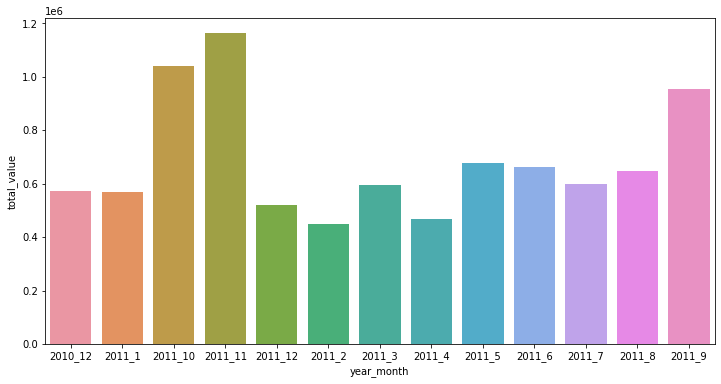

In [26]:
plt.figure(figsize=(12,6))
g1 = rfm_df.groupby('year_month')['total_value'].sum().sort_values(ascending=True).reset_index()
sns.barplot(x='year_month', y='total_value', data=g1)
plt.show()
#[rfm_df['total_value']<=250]

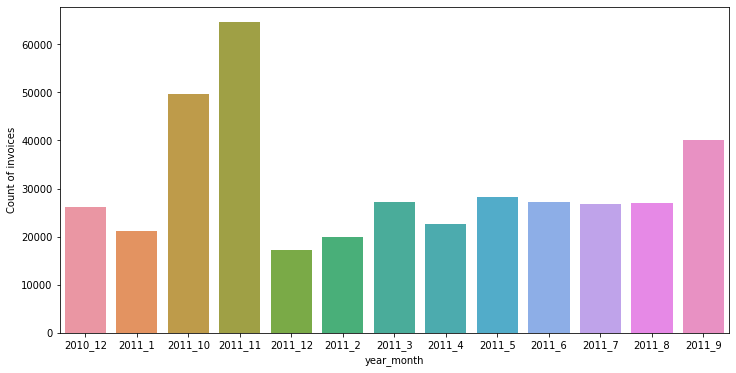

In [27]:
plt.figure(figsize=(12,6))
g = rfm_df.groupby('year_month')['InvoiceNo'].count().sort_values(ascending=True).reset_index()
sns.barplot(x='year_month', y='InvoiceNo', data=g)
plt.ylabel('Count of invoices')
plt.show()

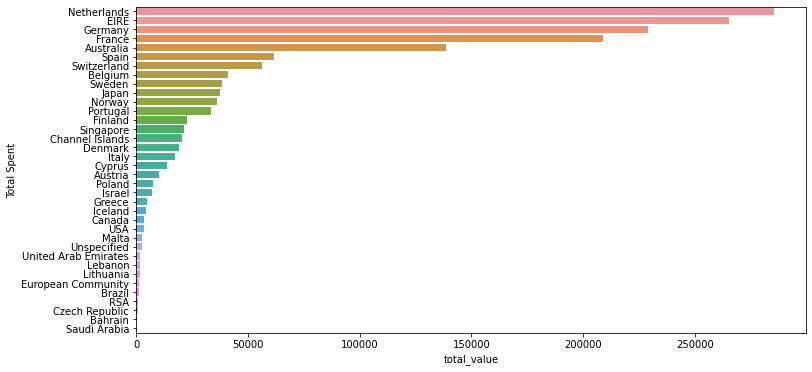

In [28]:
#excluded Britain which is by far the highest and was affecting the readbility of chart
plt.figure(figsize=(12,6))
g = rfm_df.groupby('Country')['total_value'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='total_value', y='Country', orient='h', data=g[g['Country']!='United Kingdom'])
plt.ylabel('Total Spent')
plt.show()

In [29]:
rfm_df.describe()

,Quantity,UnitPrice,total_value,year,month,days_since
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,22.394749,2010.934259,7.612537,174.562839
std,180.420210,22.096788,309.055588,0.247829,3.416527,112.819533
min,1.000000,0.000000,0.000000,2010.000000,1.000000,23.000000
25%,2.000000,1.250000,4.680000,2011.000000,5.000000,73.000000
50%,6.000000,1.950000,11.800000,2011.000000,8.000000,154.000000
75%,12.000000,3.750000,19.800000,2011.000000,11.000000,269.000000
max,80995.000000,8142.750000,168469.600000,2011.000000,12.000000,396.000000


## Cohort Analysis

In [129]:
#keep relevant columns and drop duplicates
df = rfm_df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()

In [130]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [141]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [143]:
df_cohort.head(3)

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2


In [144]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [145]:
cohort_pivot # Cohort Table showing retention row-wise

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#retention-martrix
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

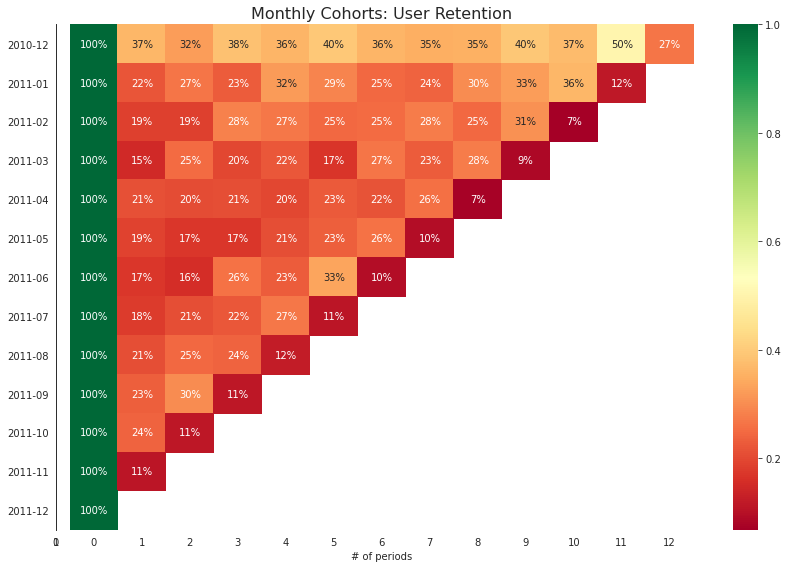

In [158]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [0, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    fig.tight_layout()

### RFM Data analysis

In [31]:
agg = {
       'recency': ('days_since','max'),
       'frequency': ('InvoiceNo', pd.Series.nunique),
       'monetary': ('total_value', 'mean')
      }
rfm_main = rfm_df.groupby('CustomerID').agg(**agg)

In [32]:
rfm_main.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,348,1,77183.600000
12347.0,390,7,23.681319
12348.0,381,4,57.975484
12349.0,41,1,24.076027
12350.0,333,1,19.670588


In [33]:
rfm_main.loc[12346,:]

recency        348.0
frequency        1.0
monetary     77183.6
Name: 12346.0, dtype: float64

In [34]:
rfm_df[rfm_df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_value,year,month,year_month,days_since
61619,541431,23166,medium ceramic top storage jar,74215,2011-01-18,1.04,12346,United Kingdom,77183.6,2011,1,2011_1,348


In [35]:
rfm_main.describe()

,recency,frequency,monetary
count,4339.000000,4339.000000,4339.000000
mean,245.782899,4.271952,68.303655
std,117.883623,7.705493,1467.745469
min,23.000000,1.000000,0.000000
25%,135.000000,1.000000,12.353054
50%,271.000000,2.000000,17.716923
75%,349.000000,5.000000,24.848410
max,396.000000,210.000000,77183.600000


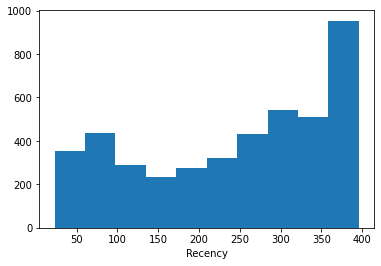

In [36]:
fig, ax=plt.subplots()
ax.hist(rfm_main['recency'])
ax.set_xlabel('Recency')
plt.show()

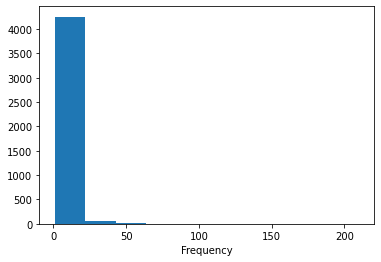

In [37]:
fig, ax=plt.subplots()
ax.hist(rfm_main['frequency'])
ax.set_xlabel('Frequency')
plt.show()

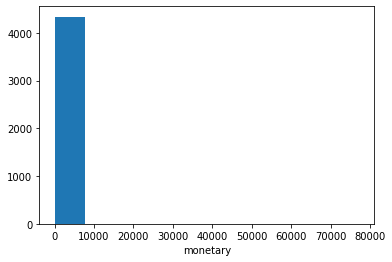

In [38]:
fig, ax=plt.subplots()
ax.hist(rfm_main['monetary'])
ax.set_xlabel('monetary')
plt.show()

## 2 stage clustering

In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_RFM = scaler.fit_transform(rfm_main)

In [41]:
kmeans = KMeans(n_clusters=200, random_state=123)
kmeans.fit(scaled_RFM)

KMeans(n_clusters=200, random_state=123)

In [42]:
rfm_main['kmeans_clusters'] = kmeans.labels_

In [43]:
clusters, count = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((clusters, count)))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
  162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
  180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
  198 199]
 [ 22  85   1   2  46  11   1   1   2  17 103  40  37   1  20   8  54   4
   15  39  34   8   2  56   9   1   9   1  41  48  30  16  23  28  24   3
   10   6  44   7   3  29  

In [44]:
cluster_att = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Amount'],
                           index=np.unique(kmeans.labels_))

cluster_att.head()

,Recency,Frequency,Amount
0,0.788147,0.094495,-0.031350
1,-1.733569,-0.424675,-0.032177
2,-0.150869,-0.294882,38.218930
3,1.274430,11.386444,-0.036305
4,-0.227224,-0.294882,-0.034878


In [45]:
cluster_att.shape

(200, 3)

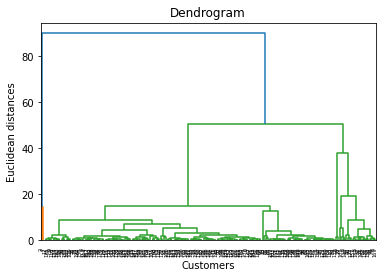

In [46]:
#plotting dendrogram to understand viable number of segments
dendrogram = sch.dendrogram(sch.linkage(cluster_att, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#cutting it below distance 20 roughly gives 6 clusters.

In [47]:
#Hierarchical clustering using 6 clusters
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(cluster_att)

array([5, 1, 0, 4, 5, 2, 3, 0, 2, 5, 1, 5, 5, 1, 5, 5, 1, 5, 1, 5, 5, 2,
       2, 1, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 1, 2, 1, 5, 5, 5, 2, 1, 5, 2,
       5, 1, 5, 5, 5, 1, 5, 5, 2, 5, 5, 2, 5, 1, 5, 1, 5, 1, 5, 1, 5, 5,
       5, 5, 5, 5, 2, 1, 5, 5, 5, 5, 3, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 1,
       5, 5, 1, 5, 5, 1, 1, 5, 1, 5, 2, 5, 5, 5, 4, 1, 5, 1, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1,
       2, 1, 5, 1, 1, 5, 5, 1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2,
       5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 2, 5, 1, 5, 1, 1, 1,
       1, 2, 5, 5, 1, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5,
       5, 1])

In [48]:
cluster_att['labels_final'] = cluster.labels_

In [49]:
cluster_att = cluster_att.reset_index()

In [50]:
rfm_main.head()

,recency,frequency,monetary,kmeans_clusters
CustomerID,,,,
12346.0,348,1,77183.600000,7
12347.0,390,7,23.681319,190
12348.0,381,4,57.975484,33
12349.0,41,1,24.076027,1
12350.0,333,1,19.670588,107


In [51]:
cluster_att.head()

,index,Recency,Frequency,Amount,labels_final
0,0,0.788147,0.094495,-0.031350,5
1,1,-1.733569,-0.424675,-0.032177,1
2,2,-0.150869,-0.294882,38.218930,0
3,3,1.274430,11.386444,-0.036305,4
4,4,-0.227224,-0.294882,-0.034878,5


In [52]:
rfm_main = rfm_main.merge(cluster_att[['index','labels_final']], left_on='kmeans_clusters', right_on='index')

In [53]:
rfm_main.head()

,recency,frequency,monetary,kmeans_clusters,index,labels_final
0,348,1,77183.600000,7,7,0
1,390,7,23.681319,190,190,5
2,396,7,31.847310,190,190,5
3,392,7,19.386755,190,190,5
4,388,7,16.183117,190,190,5


In [54]:
rfm_main.columns

Index(['recency', 'frequency', 'monetary', 'kmeans_clusters', 'index',
       'labels_final'],
      dtype='object')

In [55]:
rfm_main.drop(['kmeans_clusters','index'], axis=1, inplace=True)

In [57]:
rfm_main[rfm_main['labels_final']==4]

,recency,frequency,monetary,labels_final
4074,395,86,36.688230,4
4111,392,97,32.357442,4
4288,396,93,4.502463,4
4289,396,91,25.543464,4
4335,396,124,5.223852,4


### Attempting clustering with just k-means with 6 clusters

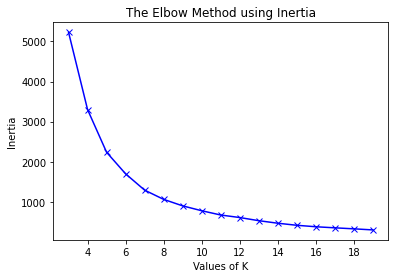

In [58]:
#verifying above approach for adequate cluster count just using k-means
inertia = []
for i in range(3,20):
    k = KMeans(n_clusters=i).fit(scaled_RFM)
    inertia.append(k.inertia_)

plt.plot(range(3,20), inertia, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [71]:
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(scaled_RFM)
rfm_main['kmeans_only'] = kmeans.labels_

### DBSCAN

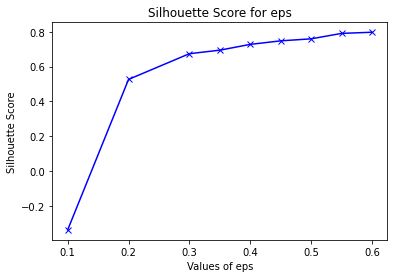

In [85]:
silhouette=[]
eps_d = [0.1,0.2,0.3,0.35,0.4,0.45,0.5,0.55,0.6]
for i in eps_d:
    db_default = DBSCAN(eps = i, min_samples = 50).fit(scaled_RFM)
    silhouette.append(silhouette_score(scaled_RFM, db_default.labels_))
    
plt.plot(eps_d, silhouette, 'bx-') 
plt.xlabel('Values of eps') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Score for eps') 
plt.show()    

In [110]:
db = DBSCAN(eps = 0.15, min_samples = 6).fit(scaled_RFM)
rfm_main['db_labels'] = db.labels_

### Final Cluster counts and inherent attributes

#### K-Means with 6 clusters

In [72]:
rfm_main.kmeans_only.value_counts()

4    1488
0    1386
2    1303
3     153
5       7
1       2
Name: kmeans_only, dtype: int64

In [78]:
rfm_main.groupby('kmeans_only')[['recency','frequency','monetary']].mean()

,recency,frequency,monetary
kmeans_only,,,
0,248.204906,4.546176,76.943414
1,322.500000,1.000000,38756.800000
2,241.772832,4.093630,33.979646
3,246.111111,4.764706,47.358385
4,247.393145,4.136425,40.734800
5,141.285714,2.142857,11.099452


#### 2-stage clustering results

In [56]:
rfm_main['labels_final'].value_counts()

5    2926
1    1337
2      67
4       5
3       2
0       2
Name: labels_final, dtype: int64

In [59]:
#behavioural traits of people in different clusters for 2 stage clustering
rfm_main.groupby('labels_final').mean()

,recency,frequency,monetary
labels_final,,,
0,288.000000,1.500000,66670.550000
1,92.584892,1.692595,43.003638
2,383.014925,35.134328,91.487173
3,396.000000,205.500000,16.335725
4,395.000000,98.200000,20.863090
5,312.255981,4.447710,33.925485


#### DBSCAN results

In [111]:
rfm_main['db_labels'].value_counts()

 0    4198
-1     115
 1       8
 3       6
 2       6
 4       6
Name: db_labels, dtype: int64

In [113]:
rfm_main.groupby('db_labels')[['recency','frequency','monetary']].mean()

,recency,frequency,monetary
db_labels,,,
-1,250.173913,5.156522,725.329669
0,245.851358,4.251787,50.375224
1,290.625000,4.625000,137.999454
2,189.500000,6.333333,16.648792
3,161.333333,1.666667,24.892092
4,194.666667,1.500000,21.369553


### Observations :

1. 2-stage clustering is doing a good job in finding clusters with varying attributes for customers, however the cluster sizes are imbalanced.

2. k-means clustering is also doing a good job in finding varying clusters of customers, with balanced cluster sizes as well.

3. DBSCAN performance is well becasue its ignoring the outliers and finding the homogenous groups, but is extremely imbalanced

## Visualisation of the clusters by reducing dimensions from 3 to 2 using t-sne

In [61]:
from sklearn.manifold import TSNE

In [62]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(rfm_main)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4339 samples in 0.003s...
[t-SNE] Computed neighbors for 4339 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4339
[t-SNE] Computed conditional probabilities for sample 2000 / 4339
[t-SNE] Computed conditional probabilities for sample 3000 / 4339
[t-SNE] Computed conditional probabilities for sample 4000 / 4339
[t-SNE] Computed conditional probabilities for sample 4339 / 4339
[t-SNE] Mean sigma: 3.848562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.648563
[t-SNE] KL divergence after 300 iterations: 1.245040


Text(0.5, 1.0, 'Clusters for 2-stage clustering')

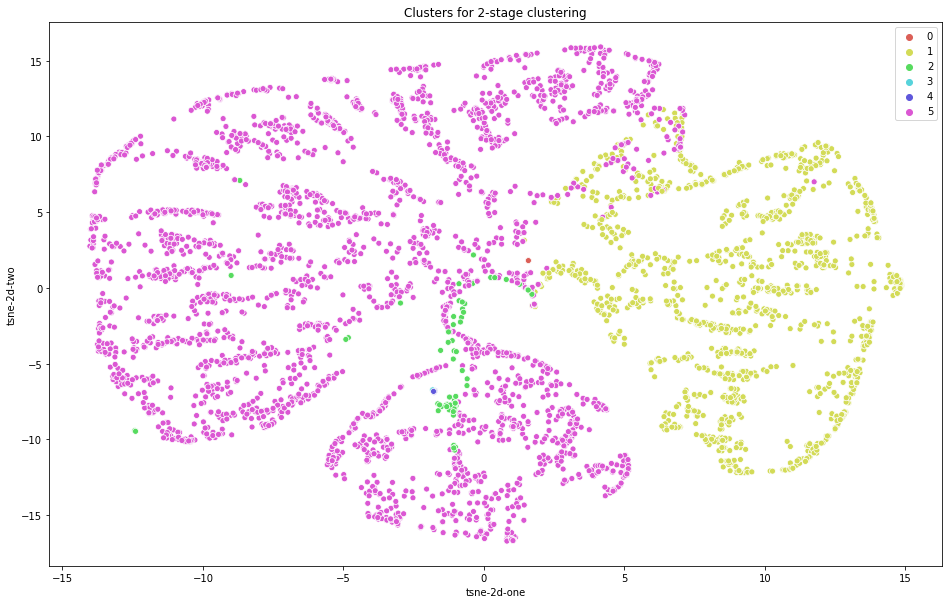

In [73]:
rfm_main['tsne-2d-one'] = tsne_results[:,0]
rfm_main['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=rfm_main.labels_final.tolist(),
                palette=sns.color_palette("hls", 6), legend='full', data=rfm_main)
plt.title("Clusters for 2-stage clustering")

Text(0.5, 1.0, 'Clusters formed from K-Means clustering')

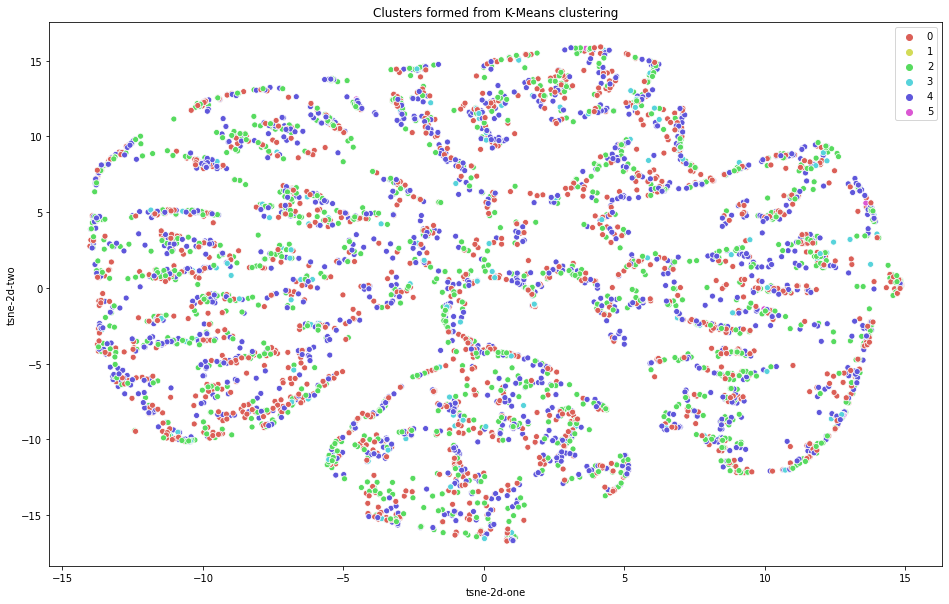

In [101]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=rfm_main.kmeans_only.tolist(),
                palette=sns.color_palette("hls", 6), legend='full', data=rfm_main)
plt.title("Clusters formed from K-Means clustering")

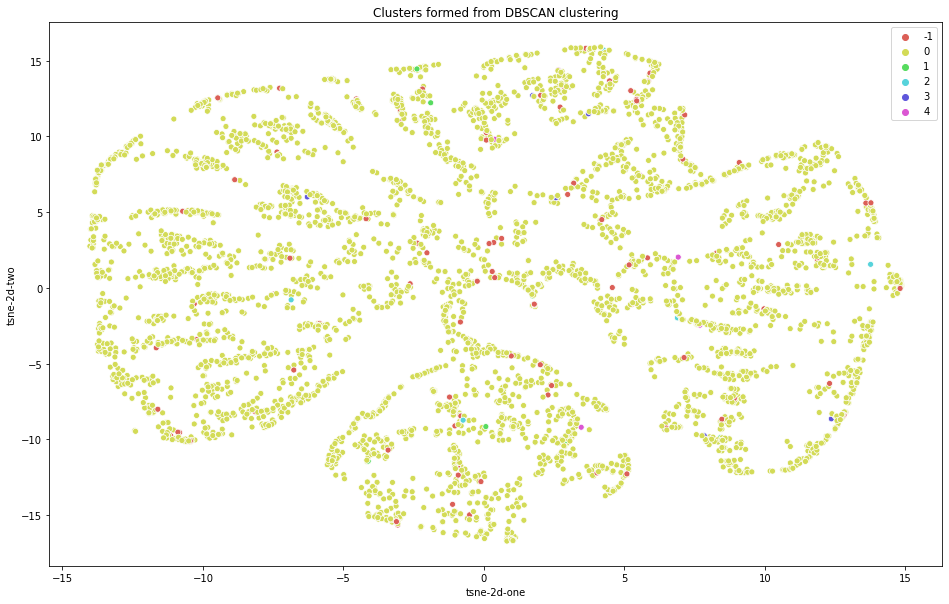

In [112]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=rfm_main.db_labels.tolist(),
                palette=sns.color_palette("hls", 6), legend='full', data=rfm_main)
plt.title("Clusters formed from DBSCAN clustering")
plt.show()

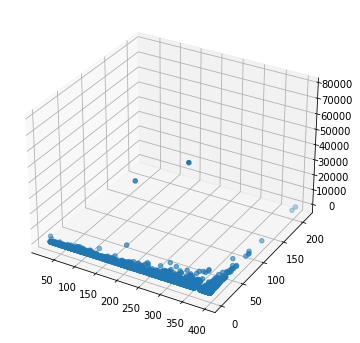

In [116]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(rfm_main['recency'], rfm_main['frequency'], rfm_main['monetary'])

In [117]:
rfm_main.head(2)

,recency,frequency,monetary,labels_final,tsne-2d-one,tsne-2d-two,kmeans_only,db_labels
0,348,1,77183.600000,0,1.582938,1.800437,1,-1
1,390,7,23.681319,5,2.429897,-7.910782,4,0


In [119]:
rfm_main.groupby('labels_final')[['recency','frequency','monetary']].mean()

,recency,frequency,monetary
labels_final,,,
0,288.000000,1.500000,66670.550000
1,92.584892,1.692595,43.003638
2,383.014925,35.134328,91.487173
3,396.000000,205.500000,16.335725
4,395.000000,98.200000,20.863090
5,312.255981,4.447710,33.925485


In [120]:
rfm_main.groupby('kmeans_only')[['recency','frequency','monetary']].mean()

,recency,frequency,monetary
kmeans_only,,,
0,248.204906,4.546176,76.943414
1,322.500000,1.000000,38756.800000
2,241.772832,4.093630,33.979646
3,246.111111,4.764706,47.358385
4,247.393145,4.136425,40.734800
5,141.285714,2.142857,11.099452


In [124]:
print(rfm_main.labels_final.value_counts())
print(rfm_main.kmeans_only.value_counts())

5    2926
1    1337
2      67
4       5
3       2
0       2
Name: labels_final, dtype: int64
4    1488
0    1386
2    1303
3     153
5       7
1       2
Name: kmeans_only, dtype: int64
